In [1]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt

ia=[]
IMG_DIR='/content/drive/MyDrive/all_photo' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img), cv.IMREAD_GRAYSCALE) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[220, 195,  91, ..., 144, 116, 253],
       [232, 106,  66, ..., 169, 162, 253],
       [229,  67,  42, ..., 203, 218, 255],
       ...,
       [247, 185, 106, ...,  47,  64, 253],
       [184, 118, 102, ...,  57,  69, 254],
       [113, 107, 118, ...,  83,  78, 255]], dtype=uint8), array([[167, 169, 182, ..., 159, 157, 157],
       [167, 175, 170, ..., 158, 149, 144],
       [180, 146, 113, ..., 152, 128, 109],
       ...,
       [ 26,  18,  16, ..., 149, 166, 183],
       [ 27,  20,  17, ..., 149, 159, 188],
       [ 30,  22,  20, ..., 148, 148, 185]], dtype=uint8), array([[113, 114, 117, ..., 113, 117, 105],
       [121, 154, 188, ..., 129, 151, 171],
       [169, 238, 222, ..., 221, 237, 217],
       ...,
       [104, 104, 103, ..., 196, 152, 126],
       [102, 100, 100, ..., 118, 106, 106],
       [100,  97,  97, ..., 107, 106, 107]], dtype=uint8), array([[ 93,  96,  98, ...,  99,  99, 106],
       [108, 102, 109, ..., 107, 134, 193],
       [110, 133, 190, ..., 123, 209, 

In [2]:
# Median Filter
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data



In [3]:
print(ia[0])

[[220 195  91 ... 144 116 253]
 [232 106  66 ... 169 162 253]
 [229  67  42 ... 203 218 255]
 ...
 [247 185 106 ...  47  64 253]
 [184 118 102 ...  57  69 254]
 [113 107 118 ...  83  78 255]]


In [4]:
print(ia[0].size)

4680


In [5]:
#from skimage import io
#image=io.imread('/content/drive/MyDrive/Tabulators-dataset/Dataset/bad/IMG_bad13.jpg')
#print(type(image))
#print(image.dtype)
#print(image.shape)
#plt.imshow(image)
sh=[]
siz=[]
for j in range(len(ia)):
  sh.append((ia[j]).shape)
  siz.append((ia[j]).size) 
print(sh) 
print(siz) 

[(180, 26), (174, 19), (187, 27), (183, 26), (171, 20), (182, 20), (173, 25), (166, 23), (191, 24), (193, 21), (183, 21), (191, 26), (198, 26), (184, 25), (176, 20), (177, 20), (174, 18), (154, 21), (179, 26), (163, 17), (176, 17), (199, 22), (166, 21), (151, 16), (189, 23), (193, 25), (166, 19), (173, 22), (182, 20), (166, 15), (149, 18), (187, 24), (174, 26), (187, 24), (156, 20), (186, 26), (174, 19), (175, 21), (169, 19), (170, 25), (157, 15), (153, 22), (150, 18), (153, 22), (170, 26), (197, 27), (174, 22), (163, 26), (181, 22), (173, 18), (156, 21), (166, 22), (169, 20), (185, 25), (165, 19), (179, 30), (160, 28), (164, 18), (188, 23), (161, 18), (163, 26), (178, 20), (156, 18), (199, 19), (198, 26), (179, 26), (174, 26), (191, 25), (155, 23), (178, 26), (183, 27), (153, 21), (192, 24), (164, 18), (186, 21), (154, 21), (184, 26), (150, 17), (191, 23), (191, 23), (168, 22), (191, 24), (152, 19), (189, 25), (176, 19), (161, 26), (183, 21), (166, 25), (163, 19), (166, 22), (151, 19)

In [6]:
"""
from skimage import io
ic=io.ImageCollection(IMG_DIR)
print('Type:', type(ic))
ic.files
"""

"\nfrom skimage import io\nic=io.ImageCollection(IMG_DIR)\nprint('Type:', type(ic))\nic.files\n"

In [7]:
"""
def show_images(images):
  n=len(images)
  f=plt.figure()
  for i in range(n):
    subplot(10,n,i+1)
    plt.imshow(images[i])

  plt.show(block=False) 
"""   

'\ndef show_images(images):\n  n=len(images)\n  f=plt.figure()\n  for i in range(n):\n    subplot(10,n,i+1)\n    plt.imshow(images[i])\n\n  plt.show(block=False) \n'

In [8]:
 #Since The images for bas, good and empty sets have different shapes, we can't repersent them 
 # show_images(ia)

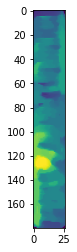

In [9]:
# Laplacian Filter : remove the speckle noise of the image 
# Laplacian
#no_Lnoise=[]
#for i in range(len(ia)):
  #blur=cv.Laplacian(ia[i], cv.CV_64F)
  #no_Lnoise.append(blur)
#no_Lnoise
#plt.imshow(no_Lnoise[0])

# Median Filter
no_ssnoise=[]
for i in range(len(ia)):
  blur=median_filter(ia[i], 5)
  no_ssnoise.append(blur)
no_ssnoise
plt.imshow(no_ssnoise[0])

In [10]:
# Gaussian Filter: To highlight the edge of an image 
# Gaussian
#no_noise=[]
#for i in range(len(no_Lnoise)):
 # blar=cv.GaussianBlur(no_Lnoise[i], (5,5), 0)
 # no_noise.append(blar)
#plt.imshow(no_noise[0])

In [11]:
no_ssnoise

[array([[  0,   0,  32, ...,  73,   0,   0],
        [  0,  32,  32, ...,  73,  51,   0],
        [  0,  32,  32, ...,  73,  73,   0],
        ...,
        [107, 118, 162, ...,  66,  66,  64],
        [  0, 107, 118, ...,  64,  64,   0],
        [  0,   0,   0, ...,  49,   0,   0]], dtype=uint8),
 array([[  0,   0, 113, ..., 119,   0,   0],
        [  0,  41,  94, ..., 109,  48,   0],
        [  0,  54,  72, ...,  81,  36,   0],
        ...,
        [ 18,  18,  18, ...,  17,  15,  15],
        [  0,  18,  18, ...,  15,  15,   0],
        [  0,   0,   0, ...,  13,   0,   0]], dtype=uint8),
 array([[  0,   0, 117, ..., 108,   0,   0],
        [  0, 117, 117, ..., 108, 108,   0],
        [  0, 117, 117, ..., 108, 108,   0],
        ...,
        [100, 101, 102, ..., 132, 118, 106],
        [  0, 100, 100, ..., 109, 106,   0],
        [  0,   0,   0, ..., 106,   0,   0]], dtype=uint8),
 array([[  0,   0,  98, ...,  99,   0,   0],
        [  0,  98, 109, ..., 107,  99,   0],
        [  0, 10

In [12]:
print(ia[0])
print(no_ssnoise[0])

[[  0   0  32 ...  73   0   0]
 [  0  32  32 ...  73  51   0]
 [  0  32  32 ...  73  73   0]
 ...
 [107 118 162 ...  66  66  64]
 [  0 107 118 ...  64  64   0]
 [  0   0   0 ...  49   0   0]]
[[  0   0  32 ...  73   0   0]
 [  0  32  32 ...  73  51   0]
 [  0  32  32 ...  73  73   0]
 ...
 [107 118 162 ...  66  66  64]
 [  0 107 118 ...  64  64   0]
 [  0   0   0 ...  49   0   0]]


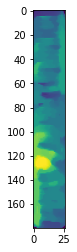

In [13]:
#cv.imread(ia[0])
plt.imshow(ia[0])

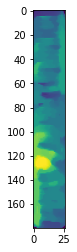

In [14]:
plt.imshow(no_ssnoise[0])

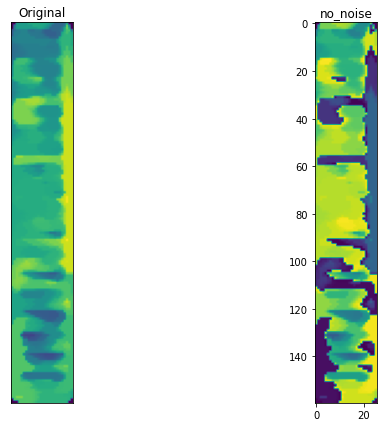

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(ia[115])
plt.title('Original')

#plt.xticks([]), plt.yticks([])
#plt.subplot(132)
#plt.imshow(no_Lnoise[115])
#plt.title('no_Laplacian')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')

plt.xticks([]), plt.yticks([])
plt.subplot(122), 
plt.title('no_noise')
plt.imshow(ia[115]+ no_ssnoise[115] )
plt.show()

In [16]:
# Local Binary Pattern Features Extractors

from skimage import feature

def lbp_features(ima, radius=1, sampling_pixels=8):
  if (len(ima.shape) > 2):
    ima=ima.astype(float)
  ima=ima.astype(np.uint8)
  i_min=np.min(ima)
  i_max=np.max(ima)
  if (i_max-i_min !=0):
    ima=(ima-i_min)/(i_max-i_min)
  lbp= feature.local_binary_pattern(ima, sampling_pixels, radius, method='uniform')
  (hist, _)=np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels+3), range=(0, sampling_pixels+2))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  return hist      


In [17]:
lbp_hist=[]
for i in range(len(no_ssnoise)):
  lbp_hist.append(lbp_features(no_ssnoise[i], 2, 8))
lbp_hist

[array([0.0042735 , 0.02435897, 0.04038462, 0.13183761, 0.19059829,
        0.26538462, 0.07884615, 0.07521368, 0.12457265, 0.06452991]),
 array([0.00211736, 0.0154265 , 0.01330913, 0.06533575, 0.13581367,
        0.37174834, 0.03478524, 0.04113733, 0.26497278, 0.0553539 ]),
 array([0.00396118, 0.02733214, 0.04713805, 0.12755001, 0.18855219,
        0.25232719, 0.08615567, 0.06318083, 0.10160428, 0.10219846]),
 array([0.00588483, 0.02374947, 0.03299706, 0.08764187, 0.1557377 ,
        0.27553594, 0.10235393, 0.0714586 , 0.10067255, 0.14396805]),
 array([0.00292398, 0.01374269, 0.01374269, 0.07953216, 0.22397661,
        0.4005848 , 0.04269006, 0.04210526, 0.12602339, 0.05467836]),
 array([0.00521978, 0.03186813, 0.03956044, 0.14752747, 0.23131868,
        0.23626374, 0.07417582, 0.0717033 , 0.08873626, 0.07362637]),
 array([0.00508671, 0.02982659, 0.04369942, 0.10404624, 0.14867052,
        0.26011561, 0.08462428, 0.06843931, 0.1683237 , 0.08716763]),
 array([0.00052383, 0.00785752, 0.

<BarContainer object of 10 artists>

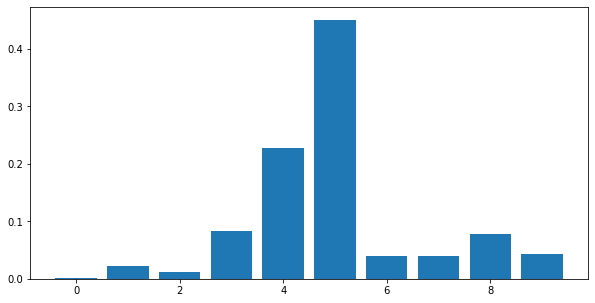

In [18]:
vals=range(len(lbp_hist[150]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbp_hist[150])

In [19]:
len(lbp_hist)

159

In [20]:
data=pd.DataFrame(lbp_hist)

In [21]:
data

0         1         2  ...         7         8         9
0    0.004274  0.024359  0.040385  ...  0.075214  0.124573  0.064530
1    0.002117  0.015426  0.013309  ...  0.041137  0.264973  0.055354
2    0.003961  0.027332  0.047138  ...  0.063181  0.101604  0.102198
3    0.005885  0.023749  0.032997  ...  0.071459  0.100673  0.143968
4    0.002924  0.013743  0.013743  ...  0.042105  0.126023  0.054678
..        ...       ...       ...  ...       ...       ...       ...
154  0.007022  0.033989  0.043258  ...  0.086798  0.074438  0.094101
155  0.007704  0.033128  0.034155  ...  0.088341  0.124807  0.080123
156  0.000236  0.007551  0.007079  ...  0.032327  0.181689  0.081878
157  0.003401  0.013082  0.013344  ...  0.083203  0.219519  0.103349
158  0.005181  0.032746  0.036891  ...  0.080000  0.121865  0.071710

[159 rows x 10 columns]

In [22]:
dat=data.T

In [23]:
dat

0         1         2    ...       156       157       158
0  0.004274  0.002117  0.003961  ...  0.000236  0.003401  0.005181
1  0.024359  0.015426  0.027332  ...  0.007551  0.013082  0.032746
2  0.040385  0.013309  0.047138  ...  0.007079  0.013344  0.036891
3  0.131838  0.065336  0.127550  ...  0.034922  0.062533  0.133886
4  0.190598  0.135814  0.188552  ...  0.200330  0.141287  0.194404
5  0.265385  0.371748  0.252327  ...  0.417178  0.309785  0.239171
6  0.078846  0.034785  0.086156  ...  0.036810  0.050497  0.084145
7  0.075214  0.041137  0.063181  ...  0.032327  0.083203  0.080000
8  0.124573  0.264973  0.101604  ...  0.181689  0.219519  0.121865
9  0.064530  0.055354  0.102198  ...  0.081878  0.103349  0.071710

[10 rows x 159 columns]

In [24]:
dat.rename(columns={0:'b1', 1:'b2', 2:'b3', 3:'b4', 4:'b5', 5:'b6', 6:'b7', 7:'b8', 8:'b9', 9:'b10', 10:'b11', 11:'b12', 12:'b13', 13:'b14', 14:'b15', 15:'b16',16:'b17', 17:'b18', 18:'b19', 19:'b20', 20:'b21', 21:'b22', 22:'b23', 23:'b24', 24:'b25', 25:'b26', 26:'b27', 27:'b28', 28:'b29', 29:'b30', 30:'b31', 31:'b32', 32:'b33', 33:'b34', 34:'b35', 35:'b36', 36:'b37', 37:'b38', 38:'b39', 39:'b40', 40:'b41', 41:'b42', 42:'b43', 43:'b44', 44:'b45', 45:'b46', 46:'b47', 47:'b48', 48:'b49', 49:'b50', 50:'b51', 51:'b52', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat

b1        b2        b3  ...       g50       g51       g52
0  0.004274  0.002117  0.003961  ...  0.000236  0.003401  0.005181
1  0.024359  0.015426  0.027332  ...  0.007551  0.013082  0.032746
2  0.040385  0.013309  0.047138  ...  0.007079  0.013344  0.036891
3  0.131838  0.065336  0.127550  ...  0.034922  0.062533  0.133886
4  0.190598  0.135814  0.188552  ...  0.200330  0.141287  0.194404
5  0.265385  0.371748  0.252327  ...  0.417178  0.309785  0.239171
6  0.078846  0.034785  0.086156  ...  0.036810  0.050497  0.084145
7  0.075214  0.041137  0.063181  ...  0.032327  0.083203  0.080000
8  0.124573  0.264973  0.101604  ...  0.181689  0.219519  0.121865
9  0.064530  0.055354  0.102198  ...  0.081878  0.103349  0.071710

[10 rows x 159 columns]

In [25]:
#from sklearn.neighbors import kneighbors_graph
#Graph=kneighbors_graph(dat,5, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False, n_jobs=None)

In [26]:
#Graph.toarray()

In [27]:
gd=dat.T
gd

0         1         2  ...         7         8         9
b1   0.004274  0.024359  0.040385  ...  0.075214  0.124573  0.064530
b2   0.002117  0.015426  0.013309  ...  0.041137  0.264973  0.055354
b3   0.003961  0.027332  0.047138  ...  0.063181  0.101604  0.102198
b4   0.005885  0.023749  0.032997  ...  0.071459  0.100673  0.143968
b5   0.002924  0.013743  0.013743  ...  0.042105  0.126023  0.054678
..        ...       ...       ...  ...       ...       ...       ...
g48  0.007022  0.033989  0.043258  ...  0.086798  0.074438  0.094101
g49  0.007704  0.033128  0.034155  ...  0.088341  0.124807  0.080123
g50  0.000236  0.007551  0.007079  ...  0.032327  0.181689  0.081878
g51  0.003401  0.013082  0.013344  ...  0.083203  0.219519  0.103349
g52  0.005181  0.032746  0.036891  ...  0.080000  0.121865  0.071710

[159 rows x 10 columns]

In [28]:
gd.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [108]:
gd

f1        f2        f3  ...        f8        f9       f10
b1   0.004274  0.024359  0.040385  ...  0.075214  0.124573  0.064530
b2   0.002117  0.015426  0.013309  ...  0.041137  0.264973  0.055354
b3   0.003961  0.027332  0.047138  ...  0.063181  0.101604  0.102198
b4   0.005885  0.023749  0.032997  ...  0.071459  0.100673  0.143968
b5   0.002924  0.013743  0.013743  ...  0.042105  0.126023  0.054678
..        ...       ...       ...  ...       ...       ...       ...
g48  0.007022  0.033989  0.043258  ...  0.086798  0.074438  0.094101
g49  0.007704  0.033128  0.034155  ...  0.088341  0.124807  0.080123
g50  0.000236  0.007551  0.007079  ...  0.032327  0.181689  0.081878
g51  0.003401  0.013082  0.013344  ...  0.083203  0.219519  0.103349
g52  0.005181  0.032746  0.036891  ...  0.080000  0.121865  0.071710

[159 rows x 10 columns]

In [30]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
#X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

In [109]:
True_label=[]
for i in range(53):
  True_label.append(0)
for i in range(54):
  True_label.append(1)  
for i in range(52):
  True_label.append(2)    


In [31]:
#A = kneighbors_graph(X, n_neighbors=5).toarray()
#print(A)

In [32]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [33]:
Matrix=gd.to_numpy()
Matrix

array([[4.27350427e-03, 2.43589744e-02, 4.03846154e-02, ...,
        7.52136752e-02, 1.24572650e-01, 6.45299145e-02],
       [2.11736237e-03, 1.54264973e-02, 1.33091349e-02, ...,
        4.11373261e-02, 2.64972777e-01, 5.53539020e-02],
       [3.96118043e-03, 2.73321450e-02, 4.71380471e-02, ...,
        6.31808279e-02, 1.01604278e-01, 1.02198455e-01],
       ...,
       [2.35960359e-04, 7.55073148e-03, 7.07881076e-03, ...,
        3.23265691e-02, 1.81689476e-01, 8.18782444e-02],
       [3.40136054e-03, 1.30821559e-02, 1.33437991e-02, ...,
        8.32025118e-02, 2.19518577e-01, 1.03349032e-01],
       [5.18134715e-03, 3.27461140e-02, 3.68911917e-02, ...,
        8.00000000e-02, 1.21865285e-01, 7.17098445e-02]])

In [34]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.97899692, 0.99880457, ..., 0.97965664, 0.9893301 ,
        0.99955056],
       [0.97899692, 1.        , 0.97325835, ..., 0.99253947, 0.994878  ,
        0.97469167],
       [0.99880457, 0.97325835, 1.        , ..., 0.97622817, 0.98674582,
        0.99899537],
       ...,
       [0.97965664, 0.99253947, 0.97622817, ..., 1.        , 0.98978791,
        0.97469605],
       [0.9893301 , 0.994878  , 0.98674582, ..., 0.98978791, 1.        ,
        0.98731955],
       [0.99955056, 0.97469167, 0.99899537, ..., 0.97469605, 0.98731955,
        1.        ]])

In [35]:
from sklearn.metrics import pairwise_distances
A=np.exp(-1./(2*1)*pairwise_distances(Matrix, metric='sqeuclidean'))
A

array([[1.        , 0.97899692, 0.99880457, ..., 0.97965664, 0.9893301 ,
        0.99955056],
       [0.97899692, 1.        , 0.97325835, ..., 0.99253947, 0.994878  ,
        0.97469167],
       [0.99880457, 0.97325835, 1.        , ..., 0.97622817, 0.98674582,
        0.99899537],
       ...,
       [0.97965664, 0.99253947, 0.97622817, ..., 1.        , 0.98978791,
        0.97469605],
       [0.9893301 , 0.994878  , 0.98674582, ..., 0.98978791, 1.        ,
        0.98731955],
       [0.99955056, 0.97469167, 0.99899537, ..., 0.97469605, 0.98731955,
        1.        ]])

In [36]:
#D = np.diag(np.sum(A,axis=1))
#L=np.power(D, -0.5)* A* np.power(D, -0.5)
#L

In [37]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [38]:
D

array([[157.90544537,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 155.57222545,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 157.78410271, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 156.07277373,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        156.94762254,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 157.71621825]])

In [39]:
D_half_inv

array([[0.07957954, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08017408, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07961014, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08004541, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.079822  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07962727]])

In [40]:
M

array([[ 0.9936671 , -0.00624621, -0.00632777, ..., -0.00624039,
        -0.00628442, -0.00633385],
       [-0.00624621,  0.99357212, -0.00621199, ..., -0.00636969,
        -0.00636688, -0.00622247],
       [-0.00632777, -0.00621199,  0.99366223, ..., -0.00622094,
        -0.00627042, -0.00633277],
       ...,
       [-0.00624039, -0.00636969, -0.00622094, ...,  0.99359273,
        -0.00632414, -0.00621252],
       [-0.00628442, -0.00636688, -0.00627042, ..., -0.00632414,
         0.99362845, -0.00627541],
       [-0.00633385, -0.00622247, -0.00633277, ..., -0.00621252,
        -0.00627541,  0.9936595 ]])

In [41]:
(e_vals, e_vecs) = np.linalg.eigh(M) 

In [104]:
#idx = e_vals.argsort()[::-1]   
#eigenValues = e_vals[idx]
#eigenVectors = e_vecs[:,idx]
pd.DataFrame(e_vecs)

0         1         2    ...       156       157       158
0   -0.079487  0.035376  0.014356  ...  0.073418  0.000000  0.000000
1   -0.078897 -0.161670  0.093094  ... -0.006597 -0.000101 -0.000280
2   -0.079456  0.060103  0.012257  ... -0.035136  0.002772  0.000275
3   -0.079387  0.033283  0.034675  ... -0.006927  0.000042 -0.000097
4   -0.079228 -0.094047 -0.107061  ...  0.039675 -0.000726  0.000112
..        ...       ...       ...  ...       ...       ...       ...
154 -0.079392  0.081730 -0.010769  ...  0.018371  0.002591 -0.000928
155 -0.079491  0.029210  0.035215  ...  0.027014  0.000322 -0.000859
156 -0.079024 -0.154909 -0.049079  ... -0.006807 -0.000383  0.000063
157 -0.079245 -0.083178  0.109731  ...  0.000051 -0.000028  0.000108
158 -0.079439  0.058363  0.028692  ... -0.177285  0.001729  0.000847

[159 rows x 159 columns]

In [79]:
eigenVectors.shape

(159, 159)

In [64]:
len(e_vals)

159

In [43]:
len(e_vecs)

159

In [81]:
# Let U be the matrix containing the differents vectors as columns
U=e_vecs
U

array([[-7.94868875e-02,  3.53762095e-02,  1.43556887e-02, ...,
         7.34177901e-02,  0.00000000e+00,  0.00000000e+00],
       [-7.88974506e-02, -1.61669629e-01,  9.30939965e-02, ...,
        -6.59681215e-03, -1.01448040e-04, -2.80066941e-04],
       [-7.94563407e-02,  6.01026637e-02,  1.22574690e-02, ...,
        -3.51362994e-02,  2.77152408e-03,  2.75031888e-04],
       ...,
       [-7.90242736e-02, -1.54909328e-01, -4.90794344e-02, ...,
        -6.80719058e-03, -3.82675436e-04,  6.30512904e-05],
       [-7.92454450e-02, -8.31777779e-02,  1.09730972e-01, ...,
         5.07970028e-05, -2.75397550e-05,  1.07902205e-04],
       [-7.94392464e-02,  5.83632589e-02,  2.86921906e-02, ...,
        -1.77285195e-01,  1.72896913e-03,  8.46746209e-04]])

array([-0.07948689, -0.07889745, -0.07945634, -0.07938728, -0.07922795,
       -0.07935925, -0.07943362, -0.07830532, -0.07949702, -0.07912685,
       -0.0790163 , -0.07951907, -0.07950887, -0.07948996, -0.0793524 ,
       -0.07946043, -0.07930656, -0.07944241, -0.07943729, -0.07929257,
       -0.0794047 , -0.07856781, -0.07945882, -0.07895695, -0.07925717,
       -0.07945019, -0.07933165, -0.07930285, -0.07921732, -0.079155  ,
       -0.07925661, -0.07939763, -0.07941026, -0.07947148, -0.07943541,
       -0.07952205, -0.0788053 , -0.07945432, -0.07915112, -0.07940579,
       -0.07892322, -0.07924827, -0.07922917, -0.0794967 , -0.07934501,
       -0.07942046, -0.07947677, -0.07929822, -0.07925557, -0.07941209,
       -0.07940969, -0.0794372 , -0.07944399, -0.07945393, -0.07857115,
       -0.07903588, -0.07943704, -0.07876428, -0.07938943, -0.07907588,
       -0.07918805, -0.07938417, -0.07861957, -0.07928597, -0.07950887,
       -0.07913956, -0.07948297, -0.07947713, -0.07948401, -0.07

In [82]:
# Form the matrix T from U by normalizing the rows to norm 1
import numba as nb
import numpy as np
id=U.shape
idx=id[0]
#@nb.njit(fastmath=True,error_model="numpy",parallel=True)
#def gaussian_kernel_2(X, X1, sigma):
T=np.empty((idx,idx))
for i in nb.prange(idx):
  for j in range(idx):
      bcc=0.
      for k in range(idx):
        bcc+=(U[i,k])**2
        T[i,j]=U[i,j]/np.sqrt(bcc)
print(T)

[[-7.94868875e-02  3.53762095e-02  1.43556887e-02 ...  7.34177901e-02
   0.00000000e+00  0.00000000e+00]
 [-7.88974506e-02 -1.61669629e-01  9.30939965e-02 ... -6.59681215e-03
  -1.01448040e-04 -2.80066941e-04]
 [-7.94563407e-02  6.01026637e-02  1.22574690e-02 ... -3.51362994e-02
   2.77152408e-03  2.75031888e-04]
 ...
 [-7.90242736e-02 -1.54909328e-01 -4.90794344e-02 ... -6.80719058e-03
  -3.82675436e-04  6.30512904e-05]
 [-7.92454450e-02 -8.31777779e-02  1.09730972e-01 ...  5.07970028e-05
  -2.75397550e-05  1.07902205e-04]
 [-7.94392464e-02  5.83632589e-02  2.86921906e-02 ... -1.77285195e-01
   1.72896913e-03  8.46746209e-04]]


In [87]:
T[0][:]

array([-0.07948689,  0.03537621,  0.01435569, -0.06313888, -0.0595467 ,
        0.0146559 , -0.0879693 ,  0.04820259, -0.02850155,  0.04870829,
       -0.05992352,  0.07313034, -0.05208473,  0.03858492, -0.04202033,
        0.07070671,  0.00150487,  0.08225625, -0.03303009, -0.03202954,
       -0.00312872, -0.01711082, -0.05505114,  0.02398025, -0.03307803,
        0.06625935, -0.03032669,  0.00205003, -0.03871661,  0.00561016,
       -0.03652523, -0.04675821,  0.03446056, -0.05252247, -0.0257654 ,
        0.0367688 ,  0.00355955,  0.10124873, -0.07997841, -0.07110404,
        0.02439729,  0.05754787,  0.00224114,  0.05015442,  0.1298817 ,
        0.07061008, -0.09109487, -0.11436344, -0.01185657, -0.00036296,
       -0.02368347, -0.04327793, -0.03548305, -0.09885797, -0.02089493,
       -0.0674054 ,  0.05815738,  0.07026229,  0.0784871 ,  0.09199333,
        0.05874294, -0.14493097,  0.04803749, -0.02158539,  0.07118246,
       -0.03855994, -0.03486285,  0.03194603, -0.0408186 ,  0.01

In [83]:
S=T[1]
sum=0
for i in range(len(S)):
 sum+=(S[i])**2
print(S)
print(sum)

[-7.88974506e-02 -1.61669629e-01  9.30939965e-02 -7.23845366e-02
 -5.25660640e-02  1.26339580e-01  5.32319394e-02 -8.92014024e-03
 -5.19329560e-03  2.03843358e-02  9.95312358e-02 -7.07644454e-03
  2.18239622e-02 -1.64649774e-01  2.19130626e-02 -6.52078136e-02
 -1.04242484e-01  2.03796140e-01  1.00009445e-01 -4.05099578e-02
 -5.14070796e-02 -7.00882565e-02 -4.88831705e-02  2.68841737e-02
 -7.35687413e-02  2.97503930e-02  1.82347398e-02  5.86284862e-02
 -5.86567678e-03 -1.45536418e-01  1.07921504e-01  9.91236394e-02
 -4.61744589e-02 -2.30429413e-02  3.66262137e-02  5.01070174e-02
 -5.51236852e-02 -7.67575533e-02 -3.67997393e-02 -7.38607493e-02
 -1.45005361e-01 -7.16297084e-02  1.24828173e-02 -7.70809023e-02
  6.80418820e-03  6.76719320e-02 -3.45390901e-02  8.68026956e-02
  9.45803483e-02 -9.86605519e-02 -3.26765593e-02 -9.97325242e-03
  2.47788471e-02 -9.30558987e-02  1.84473450e-02 -7.76028280e-02
 -5.87813724e-02 -3.53172236e-02  7.03623301e-02  7.61092373e-03
  9.04362632e-02  2.67640

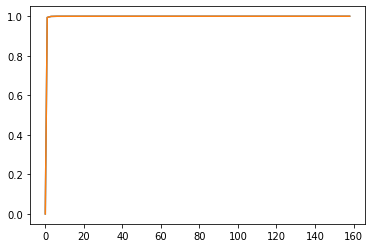

In [48]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [49]:
#e_vals_rancroi=sorted(e_vals)
#e_vals_rancroi

In [50]:
#y_i=pd.DataFrame(T)
#print(len(e_vals))

In [51]:
#y_i

In [52]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([-3.12990199e-16,  9.93799088e-01,  9.96405856e-01,  9.99108455e-01,
        9.99502633e-01,  9.99794117e-01,  9.99923903e-01,  9.99957699e-01,
        9.99975593e-01,  9.99980153e-01,  9.99986298e-01,  9.99992698e-01,
        9.99996516e-01,  9.99996972e-01,  9.99998318e-01,  9.99998763e-01,
        9.99998884e-01,  9.99999025e-01,  9.99999260e-01,  9.99999590e-01,
        9.99999618e-01,  9.99999764e-01,  9.99999789e-01,  9.99999848e-01,
        9.99999883e-01,  9.99999890e-01,  9.99999916e-01,  9.99999933e-01,
        9.99999946e-01,  9.99999954e-01,  9.99999960e-01,  9.99999965e-01,
        9.99999969e-01,  9.99999973e-01,  9.99999981e-01,  9.99999983e-01,
        9.99999984e-01,  9.99999987e-01,  9.99999991e-01,  9.99999991e-01,
        9.99999992e-01,  9.99999994e-01,  9.99999994e-01,  9.99999995e-01,
        9.99999996e-01,  9.99999996e-01,  9.99999997e-01,  9.99999997e-01,
        9.99999997e-01,  9.99999998e-01,  9.99999998e-01,  9.99999998e-01,
        9.99999998e-01,  

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

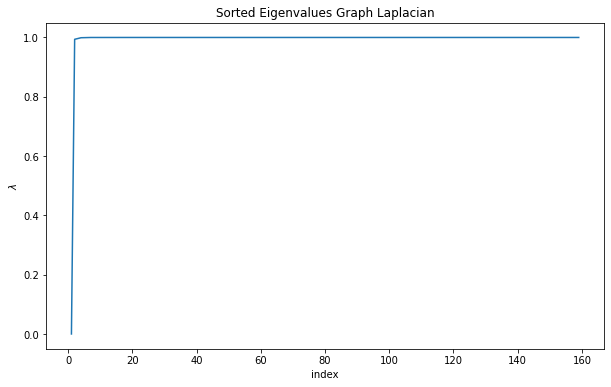

In [53]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

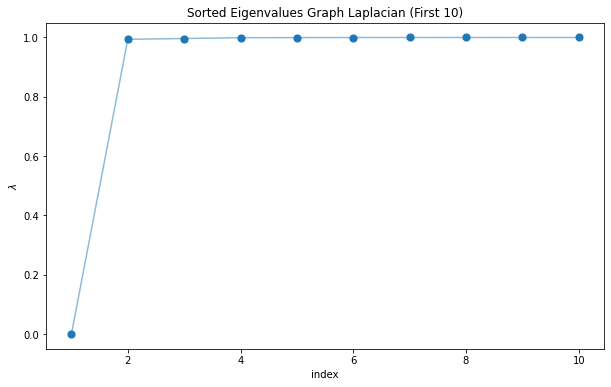

In [54]:
index_lim=10
fig, ax=plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [95]:
smallest_e_vals_index=np.argwhere((9.94181129e-01<(e_vals))&(e_vals<9.99108455e-01))
e_vals[smallest_e_vals_index]
#np.where(e_vals==np.partition)(e_vals,1)[1]) # the second smallest eigenvalue 

array([[0.99640586],
       [0.99910845]])

In [101]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()

v_1       v_2
0  0.014356 -0.063139
1  0.093094 -0.072385
2  0.012257  0.019407
3  0.034675  0.188756
4 -0.107061 -0.004935

In [57]:
#fig, ax= plt.subplots(figsize=(10,8))
#sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
#ax.set(title='Eigenvectors Generating the kernel of the Graph Laplacian')

In [58]:
"""
def project_and_transpose(e_vals, T, num_ev):
 e_vals_sorted_indices=np.argsort(e_vals)
 indices=e_vals_sorted_indices[: num_ev]

 proj_df=pd.DataFrame(T[:, indices.squeeze()])
 proj_df.columns=['v_'+str(c) for c in proj_df.columns]
 return proj_df

project_and_transpose(e_vals, T, 159)
"""

"\ndef project_and_transpose(e_vals, T, num_ev):\n e_vals_sorted_indices=np.argsort(e_vals)\n indices=e_vals_sorted_indices[: num_ev]\n\n proj_df=pd.DataFrame(T[:, indices.squeeze()])\n proj_df.columns=['v_'+str(c) for c in proj_df.columns]\n return proj_df\n\nproject_and_transpose(e_vals, T, 159)\n"

In [105]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,10)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

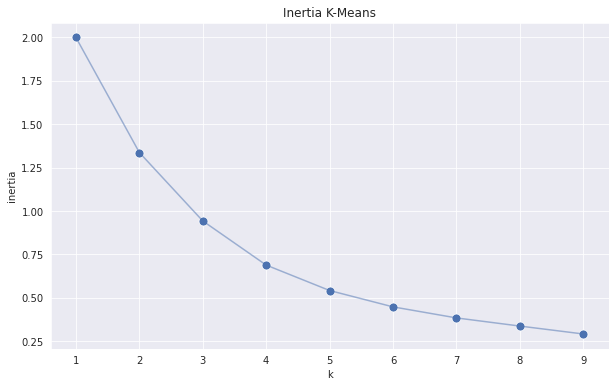

In [106]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [107]:
def run_k_means(df, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(df)
  cluster=k_means.predict(df)
  return cluster

cluster=run_k_means(proj_df, n_clusters=3)  
cluster

array([0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1,
       2, 0, 2, 0, 0], dtype=int32)

In [112]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
for i in range(53):
  if cluster[i]==0:count1+=1
  elif cluster[i]==1:count2+=1
  elif cluster[i]==2:count3+=1
for i in range(53, 107):
  if cluster[i]==0:count4+=1
  elif cluster[i]==1:count5+=1
  elif cluster[i]==2:count6+=1
for i in range(107, 159):
  if cluster[i]==0:count7+=1
  elif cluster[i]==1:count8+=1
  elif cluster[i]==2:count9+=1
print("Accuracy: ", (max(count1, count2, count3)+max(count4, count5, count6)+max(count7, count8, count9))/159)

Accuracy:  0.39622641509433965


KeyError: ignored

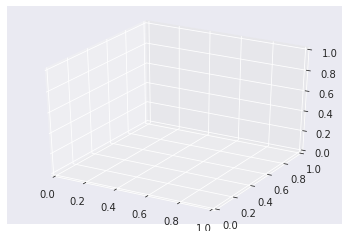

In [62]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=proj_df['v_2'], zs=0, c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('small Eigenvectors Cluster', x=0.3)

In [ ]:
#proj_df['cluster']=['c_'+ str(c) for c in cluster]

#fig, ax=plt.subplots()
#sns.scatterplot(x='r2', y='r2', data=proj_df, hue='cluster',  ax=ax)
#ax.set(title='Spectral Clustering')